# Maximum en minimum snelheid

Men kan de snelheid van een voertuig berekenen door middel van de volgende formule: 
s = d/t
s = snelheid in m/s
d = afstand in meter
t = tijd in seconden 

In [1]:
import csv
import matplotlib.pyplot as plt

timeFile1 = []
pos1 = []
pos2 = []

def readFilePos():
    with open("VRP.csv") as f:
        f = csv.reader(f, delimiter=';')
        for row in f:
            timeFile1.append(float(row[0]))
            pos1.append(float(row[1]))
            pos2.append(float(row[2]))
  

readFilePos() is een functie die de file van het eerste deel van de opdracht inleest. Alle informatie die wordt ingelezen wordt toegevoegd aan 3 verschillende arrays: 1 array voor de tijd, de andere 2 arrays voor de posities van de twee voertuigen. 

In [2]:
def speedCalc(dist, sec):
    speedArr = []
    for i in range(len(dist)):
        if sec[i] != 0:
            distance = dist[i] - dist[i-1]
            speed = distance/sec[i]
            speedArr.append(speed)

    return speedArr

speedCalc(dist, sec) is uiteindelijk de functie die de snelheden van de voertuigen op verschillende tijdstippen uitrekent. Dit wordt gedaan door eerst te berekenen hoeveel meter afstand een voertuig heeft afgelegd tussen de huidige afstand en de vorige afstand. Deze gevonden afstand wordt daarna gedeeld door het aantal seconden dat is verstreken. Hier komt dan de snelheid van de auto op dat moment uit. Deze snelheid wordt toegevoegd aan de array 'speedArr'. Deze array wordt op het eind van de functie teruggegeven.

Max speed of vehicle 1 is 4.594903169999999 m/s minimum speed of vehicle 1 is 0.0010627615062762305 m/s
Max speed of vehicle 2 is 1.9510565199999963 m/s minimum speed of vehicle 1 is 0.0 m/s


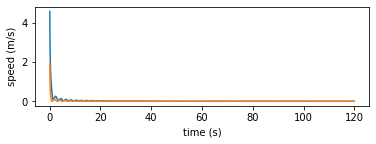

In [4]:
def findSpeeds():
    readFilePos()

    speedArr1 = speedCalc(pos1, timeFile1)
    speedArr2 = speedCalc(pos2, timeFile1)

    maxspeed1 = max(speedArr1)
    maxspeed2 = max(speedArr2)

    minspeed1 = min(speedArr1)
    minspeed2 = min(speedArr2)

    print("Max speed of vehicle 1 is", maxspeed1, "m/s minimum speed of vehicle 1 is", minspeed1, "m/s")
    print("Max speed of vehicle 2 is", maxspeed2, "m/s minimum speed of vehicle 1 is", minspeed2, "m/s")

    plt.subplot(2, 1, 1)
    plt.plot(timeFile1[1:], speedArr1)
    plt.plot(timeFile1[1:], speedArr2)
    plt.ylabel("speed (m/s)")
    plt.xlabel("time (s)")


findSpeeds()


findSpeeds() is de functie die 'readFilePos' en 'speedCalc' aanroept. Het is dus de 'main' functie van dit onderdeel. Deze functie print de maximum en minimum snelheid van de twee voertuigen uit (deze snelheden worden gevonden door 'max()' en 'min()' op de speedArr's uit te voeren). Daarnaast maakt deze functie een plot aan om alle snelheden van beide voertuigen weer te geven. 

# Botsing 

We starten met de snelheden van 3 auto's en tijdstippen. Om de afgelegde afstand te berekenen gebruik je de volgende formule:
d = s x t 
d = afstand in meters
s = snelheid in m/s
t = tijd in seconden 

In [5]:
timeFile2 = []
speed1 = []
speed2 = []
speed3 = []

def readFileSpeeds():
    with open("VRS.csv") as f:
        f = csv.reader(f, delimiter=';')
        for row in f:
            try:
                timeFile2.append(float(row[0]))
                speed1.append((float(row[1]) * .1) + float(speed1[-1]))
                speed2.append((float(row[2]) * .1) + float(speed2[-1]))
                speed3.append((float(row[3]) * .1)+ float(speed3[-1]))
            except:
                speed1.append(float(row[1]))
                speed2.append(float(row[2]))
                speed3.append(float(row[3]))

readFileSpeeds() is vergelijkbaar met readFilePos(): beide functies lezen een file in en zetten de informatie in arrays. 

Echter doet readFileSpeeds() net iets meer dan alleen dat. De functie berekent ook voor ieder voertuig de totaal afgelegde afstand. Dit is dus d = s x t. Echter tellen we hierbij ook de totaal afgelegde afstand van de vorige berekening er bij op. Hierdoor krijg je dan uiteindelijk de totaal afgelegde afstand van ieder voertuig op alle tijdstippen die in het csv file staan. 

De try-except statement is er omdat het csv-bestand in het begin de start-posities van iedere auto laat zien, en daarna pas de snelheden van de auto's. 

In [6]:
def findCollisions(p1, p2):
    if p1[0] > p2[0]:
        for i in range(len(p1)):
            if p1[i] < p2[i]:
                print("tussen "+str(timeFile2[i-1])+"s en "+str(timeFile2[i])+"s vind een botsing plaats tussen ")
                return True
    elif p1[0] < p2[0]:
        for i in range(len(p1)):
            if p1[i] > p2[i]:
                print("tussen "+str(timeFile2[i-1])+" en "+str(timeFile2[i])+" vind een botsing plaats tussen ")
                return False
    return False

findCollisions() kijkt of die een botsing tussen twee voertuigen kan vinden of niet. Dit wordt op deze manier gedaan:
Eerst kijkt de functie welke van de twee voertuigen achter de ander rijdt. Daarna kijkt de functie voor alle tijdstippen of het achterblijvende voertuig het andere voertuig ooit 'inhaalt'. Als deze wordt 'ingehaald' dan betekent dat dat de twee voertuigen met elkaar botsen. De functie print dan tussen welke tijden de botsing heeft plaatsgevonden en geeft daarna 'True' als boolean waarde terug. 

Als er geen botsing is tussen de twee voertuigen dan geeft de functie 'False' als boolean waarde terug. 

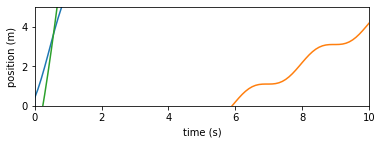

geen botsing tussen auto1 en auto2
tussen 0.5s en 0.6s vind een botsing plaats tussen 
auto1 en auto3
geen botsing tussen auto2 en auto3


In [7]:
def findPositions():
    readFileSpeeds()

    plt.subplot(2, 1, 2)
    plt.plot(timeFile2, speed1)
    plt.plot(timeFile2, speed2)
    plt.plot(timeFile2, speed3)
    plt.xlim([0,10])
    plt.ylim([0,5])
    plt.ylabel("position (m)")
    plt.xlabel("time (s)")
    plt.show()

    if findCollisions(speed1, speed2):
        print("auto1 en auto2")
    else:
        print("geen botsing tussen auto1 en auto2")

    if findCollisions(speed1, speed3):
        print("auto1 en auto3")
    else:
        print("geen botsing tussen auto1 en auto3")

    if findCollisions(speed2, speed3):
        print("auto2 en auto3")
    else:
        print("geen botsing tussen auto2 en auto3")


findPositions()

findPositions() is de main functie voor het tweede onderdeel van deze opdracht. Het roept 'readFileSpeeds()' aan om het tweede csv bestand in te lezen. Ook maakt deze functie een plot aan om de posities van de auto's weer te geven (ook zorgt deze functie er ook voor dat de plot van deel 1 wordt weergegeven). 

Tot slot roept deze functie 'findCollisions' aan om uit te vochelen of er botsingen tussen de 3 voertuigen plaats vindt. Als dit zo is dan print de functie uit tussen welke auto's deze botsing plaats vindt. 